In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
!pip install simfin
import simfin as sf

# Set your API-key for downloading data.
sf.set_api_key('79f8076c-cdc4-4ffe-9827-a82f92215739')

# Set the local directory where data-files are stored.
# The directory will be created if it does not already exist.
sf.set_data_dir('~/simfin_data/')

# Download the data from the SimFin server and load into a Pandas DataFrame.
prices_df = sf.load_shareprices(variant='daily')

# Print the first rows of the data.
list(prices_df.columns)
print(prices_df.info)

# %%

Dataset "us-shareprices-daily" on disk (1 days old).
- Loading from disk ... 

c:\Users\Apoorv\AppData\Local\Programs\Python\Python312\Lib\site-packages\simfin\load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
<bound method DataFrame.info of                    SimFinId   Open   High    Low  Close  Adj. Close   Volume  \
Ticker Date                                                                    
A      2019-04-12     45846  81.43  82.06  80.90  80.98       77.77  1249295   
       2019-04-15     45846  81.00  81.13  79.91  80.40       77.22  1627268   
       2019-04-16     45846  80.82  80.96  77.19  77.55       74.48  3441597   
       2019-04-17     45846  78.15  78.32  74.46  75.43       72.44  4471971   
       2019-04-18     45846  75.73  76.54  75.31  76.17       73.16  2874195   
...                     ...    ...    ...    ...    ...         ...      ...   
ZYXI   2024-03-11    171401  12.83  13.07  12.67  12.69       12.69   150265   
       2024-03-12    171401  12.69  12.87  12.59  12.60       12.60   151053   
       2024-03-13    171401  12.57  12.81  12.57  12.69       12.69    89921   
       2024-03-14    171401  12.69  12.73  12.18  12.19       12.19   313909   
  

In [3]:
prices_df.reset_index()

,Ticker,Date,SimFinId,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,A,2019-04-12,45846,81.43,82.06,80.90,80.98,77.77,1249295,NaN,317515869.0
1,A,2019-04-15,45846,81.00,81.13,79.91,80.40,77.22,1627268,NaN,317515869.0
2,A,2019-04-16,45846,80.82,80.96,77.19,77.55,74.48,3441597,NaN,317515869.0
3,A,2019-04-17,45846,78.15,78.32,74.46,75.43,72.44,4471971,NaN,317515869.0
4,A,2019-04-18,45846,75.73,76.54,75.31,76.17,73.16,2874195,NaN,317515869.0
...,...,...,...,...,...,...,...,...,...,...,...
5815908,ZYXI,2024-03-11,171401,12.83,13.07,12.67,12.69,12.69,150265,NaN,32170182.0
5815909,ZYXI,2024-03-12,171401,12.69,12.87,12.59,12.60,12.60,151053,NaN,32170182.0
5815910,ZYXI,2024-03-13,171401,12.57,12.81,12.57,12.69,12.69,89921,NaN,32170182.0
5815911,ZYXI,2024-03-14,171401,12.69,12.73,12.18,12.19,12.19,313909,NaN,32170182.0


In [4]:
prices_df.to_csv('./final_prices.csv', index=True)

In [5]:
# Download the data from the SimFin server and load into a Pandas DataFrame.
balance_df = sf.load_balance(variant='quarterly')


# Print the first rows of the data.
print(balance_df.head())

Dataset "us-balance-quarterly" on disk (14 days old).
- Loading from disk ... 

c:\Users\Apoorv\AppData\Local\Programs\Python\Python312\Lib\site-packages\simfin\load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2019-04-30      45846      USD         2019            Q2   2019-05-30   
       2019-07-31      45846      USD         2019            Q3   2019-08-30   
       2019-10-31      45846      USD         2019            Q4   2019-12-19   
       2020-01-31      45846      USD         2020            Q1   2020-03-03   
       2020-04-30      45846      USD         2020            Q2   2020-06-01   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2019-04-30     2019-05-30     317000000.0       321000000.0   
       2019-07-31     2019-08-30     312000000.0       316000000.0   
       2019-10-31     2020-12-18     309000000.0       313000000.0   
       2020-01-31     2020-03-03     310000000.0       313000000.0   
      

In [6]:
balance_df.reset_index()

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
0,A,2019-04-30,45846,USD,2019,Q2,2019-05-30,2019-05-30,317000000.0,321000000.0,...,NaN,1.118000e+09,1.798000e+09,2.779000e+09,3.897000e+09,5.346000e+09,-1000000.0,178000000.0,5125000000,9022000000
1,A,2019-07-31,45846,USD,2019,Q3,2019-08-30,2019-08-30,312000000.0,316000000.0,...,504000000.0,1.622000e+09,1.294000e+09,2.256000e+09,3.878000e+09,5.273000e+09,NaN,-122000000.0,4747000000,8625000000
2,A,2019-10-31,45846,USD,2019,Q4,2019-12-19,2020-12-18,309000000.0,313000000.0,...,616000000.0,2.080000e+09,1.791000e+09,2.624000e+09,4.704000e+09,5.280000e+09,NaN,-18000000.0,4748000000,9452000000
3,A,2020-01-31,45846,USD,2020,Q1,2020-03-03,2020-03-03,310000000.0,313000000.0,...,675000000.0,1.892000e+09,1.787000e+09,2.761000e+09,4.653000e+09,5.296000e+09,NaN,73000000.0,4848000000,9501000000
4,A,2020-04-30,45846,USD,2020,Q2,2020-06-01,2020-06-01,309000000.0,312000000.0,...,700000000.0,1.945000e+09,1.788000e+09,2.742000e+09,4.687000e+09,5.291000e+09,NaN,15000000.0,4768000000,9455000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55913,ZYXI,2022-12-31,171401,USD,2022,Q4,2023-03-14,2024-03-12,34718900.0,34663000.0,...,7920947.0,2.108600e+07,1.899776e+07,2.902200e+07,5.010800e+07,8.247000e+07,-33160000.0,17048000.0,66358000,116466000
55914,ZYXI,2023-03-31,171401,USD,2023,Q1,2023-04-27,2023-04-27,36694000.0,37442000.0,...,7456802.0,2.105900e+07,1.693867e+07,2.551100e+07,4.657000e+07,8.238200e+07,-36513000.0,18617000.0,64486000,111056000
55915,ZYXI,2023-06-30,171401,USD,2023,Q2,2023-07-27,2023-07-27,36435000.0,37061000.0,...,2045654.0,1.409500e+07,6.917874e+07,7.620700e+07,9.030200e+07,8.292400e+07,-42628000.0,21971000.0,62267000,152569000
55916,ZYXI,2023-09-30,171401,USD,2023,Q3,2023-10-26,2023-10-26,35531000.0,36103000.0,...,3288299.0,1.984300e+07,7.305586e+07,7.300400e+07,9.284700e+07,9.057700e+07,-57560000.0,25565000.0,58582000,151429000


In [7]:



# %%
balance_df.to_csv('./Balance-sheet.csv', index=True)


In [8]:

# %%
# Download the data from the SimFin server and load into a Pandas DataFrame.
income_df = sf.load_income(variant='quarterly')


# Print the first rows of the data.
print(income_df.head())

income_df.reset_index()

# %%
income_df.to_csv('./Income_statement.csv', index=True)

# %%
# Download the data from the SimFin server and load into a Pandas DataFrame.
cashflow_df = sf.load_cashflow(variant='quarterly')


# Print the first rows of the data.
print(cashflow_df.head())



cashflow_df.reset_index()

# %%
cashflow_df.to_csv('./Cash_flow.csv', index=True)


Dataset "us-income-quarterly" on disk (14 days old).
- Loading from disk ... 

c:\Users\Apoorv\AppData\Local\Programs\Python\Python312\Lib\site-packages\simfin\load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2019-04-30      45846      USD         2019            Q2   2019-05-30   
       2019-07-31      45846      USD         2019            Q3   2019-08-30   
       2019-10-31      45846      USD         2019            Q4   2019-12-19   
       2020-01-31      45846      USD         2020            Q1   2020-03-03   
       2020-04-30      45846      USD         2020            Q2   2020-06-01   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2019-04-30     2019-05-30     317000000.0       321000000.0   
       2019-07-31     2019-08-30     312000000.0       316000000.0   
       2019-10-31     2019-08-30     309000000.0       313000000.0   
       2020-01-31     2021-03-02     310000000.0       313000000.0   
      

c:\Users\Apoorv\AppData\Local\Programs\Python\Python312\Lib\site-packages\simfin\load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2019-04-30      45846      USD         2019            Q2   2019-05-30   
       2019-07-31      45846      USD         2019            Q3   2019-08-30   
       2019-10-31      45846      USD         2019            Q4   2019-12-19   
       2020-01-31      45846      USD         2020            Q1   2020-03-03   
       2020-04-30      45846      USD         2020            Q2   2020-06-01   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2019-04-30     2019-03-05     317000000.0       321000000.0   
       2019-07-31     2019-05-30     312000000.0       316000000.0   
       2019-10-31     2019-08-30     309000000.0       313000000.0   
       2020-01-31     2021-03-02     310000000.0       313000000.0   
      

In [ ]:
# File paths
prices_file = "final_prices.csv"
balance_file = "Balance-sheet.csv"
cashflow_file = "Cash_flow.csv"
income_file = "Income_statement.csv"

# Load datasets
df_prices = pd.read_csv(prices_file)
df_balance = pd.read_csv(balance_file, sep=",")
df_cashflow = pd.read_csv(cashflow_file, sep=",")
df_income = pd.read_csv(income_file, sep=",")

# Print column names and data types
print("Stock Prices Columns:\n", df_prices.dtypes)
print("\nBalance Sheet Columns:\n", df_balance.dtypes)
print("\nCash Flow Columns:\n", df_cashflow.dtypes)
print("\nIncome Statement Columns:\n", df_income.dtypes)


Stock Prices Columns:
 Ticker                 object
Date                   object
SimFinId                int64
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj. Close            float64
Volume                  int64
Dividend              float64
Shares Outstanding    float64
dtype: object

Balance Sheet Columns:
 Ticker                                              object
Report Date                                         object
SimFinId                                             int64
Currency                                            object
Fiscal Year                                          int64
Fiscal Period                                       object
Publish Date                                        object
Restated Date                                       object
Shares (Basic)                                     float64
Shares (Diluted)                                   float64
Cash, Cash Equival

In [10]:


# Convert 'Date' columns to datetime format
df_prices["Date"] = pd.to_datetime(df_prices["Date"])
df_balance["Report Date"] = pd.to_datetime(df_balance["Report Date"])
df_cashflow["Report Date"] = pd.to_datetime(df_cashflow["Report Date"])
df_income["Report Date"] = pd.to_datetime(df_income["Report Date"])

# Rename 'Report Date' to 'Date' for consistency
df_balance.rename(columns={"Report Date": "Date"}, inplace=True)
df_cashflow.rename(columns={"Report Date": "Date"}, inplace=True)
df_income.rename(columns={"Report Date": "Date"}, inplace=True)

# Define selected tickers
selected_tickers = ["GOOG", "META", "AAPL", "F", "NFLX"]

# Filter only selected tickers
df_prices = df_prices[df_prices["Ticker"].isin(selected_tickers)]
df_balance = df_balance[df_balance["Ticker"].isin(selected_tickers)]
df_cashflow = df_cashflow[df_cashflow["Ticker"].isin(selected_tickers)]
df_income = df_income[df_income["Ticker"].isin(selected_tickers)]

# Function to merge financials with the nearest available report date
df_merged = df_prices.merge(df_balance, on=["Ticker", "Date"], how="left", suffixes=("", "_balance"))
# Merge with cash flow data
df_merged = df_merged.merge(df_cashflow, on=["Ticker", "Date"], how="left", suffixes=("", "_cashflow"))
# Merge with income statement data
df_merged = df_merged.merge(df_income, on=["Ticker", "Date"], how="left", suffixes=("", "_income"))



In [11]:
# Create binary target variable (1 = Price Up, 0 = Price Down)
df_merged["Price_Up"] = (df_merged["Close"].shift(-1) > df_merged["Close"]).astype(int)
df_merged = df_merged[:-1]  # Drop last row since it has no next-day price

# Add technical indicators
def add_technical_indicators(df):
    df["SMA_5"] = df["Close"].rolling(window=5).mean()
    df["SMA_10"] = df["Close"].rolling(window=10).mean()
    df["RSI_14"] = compute_rsi(df["Close"], 14)
    return df

def compute_rsi(series, window):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df_merged = add_technical_indicators(df_merged)

# Drop non-numeric columns except 'Price_Up'
df_final = df_merged.select_dtypes(include=[np.number])


In [12]:
df_final = df_final.dropna(axis=1, how='all')

df_final["Dividend"].fillna(0, inplace=True)


df_final.fillna(method="ffill", inplace=True)
df_final.fillna(method="bfill", inplace=True)

C:\Users\Apoorv\AppData\Local\Temp\ipykernel_68148\141335596.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["Dividend"].fillna(0, inplace=True)
C:\Users\Apoorv\AppData\Local\Temp\ipykernel_68148\141335596.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final.fillna(method="ffill", inplace=True)
C:\Users\Apoorv\AppData\Local\Temp\ipykernel_68148\141335596.py:7: FutureWarning: DataFrame.fillna with 'method' is depreca

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6199 entries, 0 to 6198
Data columns (total 78 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   SimFinId                                         6199 non-null   int64  
 1   Open                                             6199 non-null   float64
 2   High                                             6199 non-null   float64
 3   Low                                              6199 non-null   float64
 4   Close                                            6199 non-null   float64
 5   Adj. Close                                       6199 non-null   float64
 6   Volume                                           6199 non-null   int64  
 7   Dividend                                         6199 non-null   float64
 8   Shares Outstanding                               6199 non-null   float64
 9   SimFinId_balance              

In [15]:

# Get unique tickers
company_tickers = df_merged["Ticker"].unique()

# Create a dictionary to store separate DataFrames for each company
company_datasets = {}

for ticker in company_tickers:
    company_datasets[ticker] = df_final[df_merged["Ticker"] == ticker].copy()



In [16]:
company_datasets.items()

dict_items([('AAPL',       SimFinId    Open    High     Low   Close  Adj. Close     Volume  \
0       111052   49.80   50.03   49.05   49.72       47.64  111042672   
1       111052   49.65   49.96   49.50   49.81       47.72   70146584   
2       111052   49.87   50.34   49.64   49.81       47.73  102785540   
3       111052   49.88   50.84   49.65   50.78       48.66  115627120   
4       111052   50.78   51.04   50.63   50.97       48.83   96783064   
...        ...     ...     ...     ...     ...         ...        ...   
1235    111052  172.94  174.38  172.05  172.75      171.94   58929918   
1236    111052  173.15  174.03  171.01  173.23      172.42   59544927   
1237    111052  172.77  173.19  170.76  171.13      170.33   51948951   
1238    111052  172.91  174.31  172.05  173.00      172.19   72571635   
1239    111052  171.17  172.62  170.28  172.62      171.81  121752699   

      Dividend  Shares Outstanding  SimFinId_balance  ...  \
0          0.0        1.842914e+10       

In [ ]:


os.makedirs("saved_models", exist_ok=True)


# Dictionary to store trained models for each company
company_models = {}

for ticker, df_company in company_datasets.items():
    print(f"\nProcessing {ticker}...")

    # Separate target variable
    y = df_company["Price_Up"]
    X = df_company.drop(columns=["Price_Up"])

    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    # Feature Selection using ElasticNet
    param_grid = {'alpha': [0.0001, 0.001, 0.01], 'l1_ratio': [0.3, 0.5, 0.7]}
    grid_search = GridSearchCV(ElasticNet(max_iter=10000), param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_scaled, y)

    # Select important features
    best_elastic_net = grid_search.best_estimator_
    selected_features = X_scaled.columns[best_elastic_net.coef_ != 0]
    X_selected = X_scaled[selected_features]

    print(f"Selected Features for {ticker}: {selected_features.tolist()}")


    selected_f = selected_features.tolist()
    features_filename = f"saved_models/{ticker}_selected_f.joblib"
    joblib.dump(selected_f, features_filename) # Save the features
    print(f"✅ Features for {ticker} saved as {features_filename}")


    # Handle class imbalance
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_selected, y)

    # Store processed dataset
    company_datasets[ticker] = (X_resampled, y_resampled)




Processing AAPL...
Selected Features for AAPL: ['Open', 'Close', 'Dividend', 'Long Term Debt', 'Non-Cash Items', 'Change in Working Capital', 'Net Cash from Operating Activities', 'Net Change in Long Term Investment', 'Net Cash from Acquisitions & Divestitures', 'Net Cash from Financing Activities']
✅ Features for AAPL saved as saved_models/AAPL_selected_f.joblib

Processing F...
Selected Features for F: ['Open', 'High', 'Volume', 'Shares Outstanding', 'Inventories', 'Total Current Liabilities', 'Non-Cash Items', 'Change in Fixed Assets & Intangibles', 'Net Cash from Acquisitions & Divestitures', 'Net Cash from Investing Activities', 'Income Tax (Expense) Benefit, Net']
✅ Features for F saved as saved_models/F_selected_f.joblib

Processing GOOG...
Selected Features for GOOG: ['Share Capital & Additional Paid-In Capital', 'Depreciation & Amortization', 'Change in Other', 'Net Change in Long Term Investment', 'Net Cash from Acquisitions & Divestitures', 'Dividends Paid', 'Cost of Revenu

In [18]:
for ticker, (X_train, y_train) in company_datasets.items():
    print(f"\nClass distribution for {ticker}:")
    print(pd.Series(y_train).value_counts())



Class distribution for AAPL:
Price_Up
1    645
0    645
Name: count, dtype: int64

Class distribution for F:
Price_Up
0    645
1    645
Name: count, dtype: int64

Class distribution for GOOG:
Price_Up
1    671
0    671
Name: count, dtype: int64

Class distribution for META:
Price_Up
1    642
0    642
Name: count, dtype: int64

Class distribution for NFLX:
Price_Up
0    630
1    630
Name: count, dtype: int64


In [19]:
from sklearn.ensemble import RandomForestClassifier

for ticker, (X_train, y_train) in company_datasets.items():
    print(f"\nTraining model for {ticker}...")

    # Try Logistic Regression first
    log_reg = LogisticRegression(max_iter=5000, class_weight="balanced")

    param_grid_log = {
        "C": [0.01, 0.1, 1, 10, 100],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear", "saga"]
    }

    grid_search_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring="roc_auc", n_jobs=-1)
    grid_search_log.fit(X_train, y_train)

    best_log_reg = grid_search_log.best_estimator_

    # Check if Logistic Regression is failing
    y_proba_log = best_log_reg.predict_proba(X_train)[:, 1]

    if len(np.unique(y_proba_log)) == 1:  # Logistic Regression fails (all 0.5)
        print(f"⚠️ Logistic Regression failed for {ticker}. Switching to RandomForest...")

        # Train RandomForestClassifier
        rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, class_weight="balanced")
        rf_model.fit(X_train, y_train)

        company_models[ticker] = rf_model
        print(f"✅ RandomForest model trained for {ticker}.")
    else:
        company_models[ticker] = best_log_reg
        print(f"✅ Best Logistic Regression model selected for {ticker}.")





Training model for AAPL...
⚠️ Logistic Regression failed for AAPL. Switching to RandomForest...
✅ RandomForest model trained for AAPL.

Training model for F...
⚠️ Logistic Regression failed for F. Switching to RandomForest...
✅ RandomForest model trained for F.

Training model for GOOG...
⚠️ Logistic Regression failed for GOOG. Switching to RandomForest...
✅ RandomForest model trained for GOOG.

Training model for META...
⚠️ Logistic Regression failed for META. Switching to RandomForest...
✅ RandomForest model trained for META.

Training model for NFLX...
✅ Best Logistic Regression model selected for NFLX.


In [ ]:
for ticker, model in company_models.items():
    print(f"\nOptimizing threshold for {ticker}...")

    # Fix: Extract only first two elements
    X_test, y_test = company_datasets[ticker][:2]

    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    if len(np.unique(y_proba)) == 1:  # Fix for "all 0.5" issue
        optimal_threshold = 0.5
        print(f"Warning: {ticker} has only one probability value. Using default threshold = 0.5.")
    else:
        optimal_threshold = thresholds[(tpr - fpr).argmax()]

    y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)
    company_datasets[ticker] = (X_test, y_test)  # Store only two elements

    print(f"Optimal Threshold for {ticker}: {optimal_threshold:.2f}")



Optimizing threshold for AAPL...
Optimal Threshold for AAPL: 0.48

Optimizing threshold for F...
Optimal Threshold for F: 0.52

Optimizing threshold for GOOG...
Optimal Threshold for GOOG: 0.53

Optimizing threshold for META...
Optimal Threshold for META: 0.49

Optimizing threshold for NFLX...
Optimal Threshold for NFLX: 0.49


In [21]:
for ticker, (X_test, y_test) in company_datasets.items():  # Unpack all 3 values
    print(f"\nChecking predictions for {ticker}...")

    y_proba = company_models[ticker].predict_proba(X_test)[:, 1]

    print("Min Probability:", y_proba.min())
    print("Max Probability:", y_proba.max())
    print("Unique Values in Predictions:", np.unique(y_proba))



Checking predictions for AAPL...
Min Probability: 0.24024819158727984
Max Probability: 0.6847330046172122
Unique Values in Predictions: [0.24024819 0.249772   0.26029801 0.27360533 0.29095862 0.29429195
 0.29567071 0.29713625 0.30339183 0.30483872 0.31956915 0.32345695
 0.32508143 0.32551479 0.33043261 0.33052991 0.33531061 0.33749156
 0.34228897 0.34425131 0.34503367 0.34789076 0.34890616 0.35320734
 0.35371086 0.3559027  0.36470111 0.36766027 0.36950064 0.37245628
 0.37690098 0.37709928 0.37782074 0.37805398 0.3784936  0.38041828
 0.38153103 0.38179128 0.38347909 0.38476423 0.38653981 0.38739621
 0.38912146 0.39177876 0.39245653 0.39352921 0.39441401 0.3947618
 0.39565098 0.39622784 0.39690098 0.3984936  0.39957537 0.39997947
 0.4009936  0.40120648 0.40177396 0.40189579 0.40320316 0.40347909
 0.40385271 0.4041198  0.40476423 0.40499764 0.40557898 0.40741317
 0.40896306 0.40920867 0.41015321 0.41157923 0.41174211 0.41178371
 0.41397147 0.4143333  0.4144023  0.41575804 0.41697335 0.41


Model Evaluation for AAPL:

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       645
           1       0.67      0.64      0.66       645

    accuracy                           0.66      1290
   macro avg       0.66      0.66      0.66      1290
weighted avg       0.66      0.66      0.66      1290

ROC-AUC Score: 0.6643


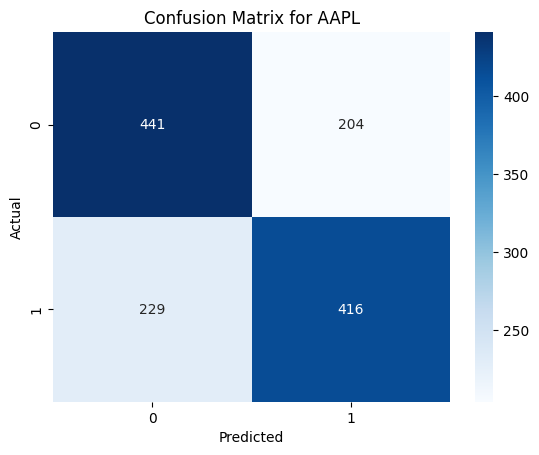


Model Evaluation for F:

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       645
           1       0.64      0.70      0.67       645

    accuracy                           0.66      1290
   macro avg       0.66      0.66      0.66      1290
weighted avg       0.66      0.66      0.66      1290

ROC-AUC Score: 0.6574


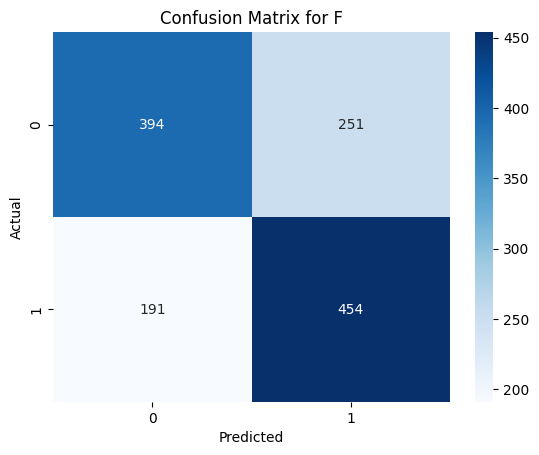


Model Evaluation for GOOG:

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       671
           1       0.67      0.65      0.66       671

    accuracy                           0.66      1342
   macro avg       0.66      0.66      0.66      1342
weighted avg       0.66      0.66      0.66      1342

ROC-AUC Score: 0.6632


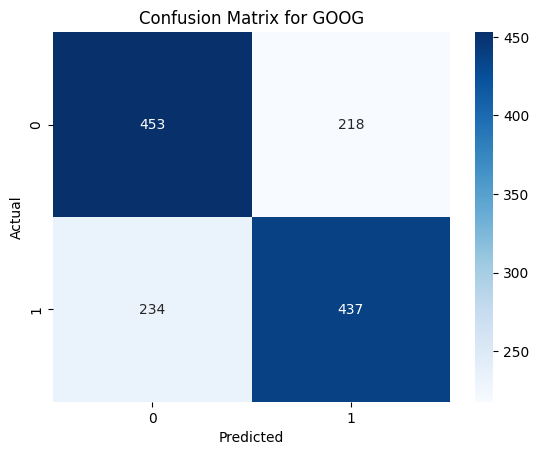


Model Evaluation for META:

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       642
           1       0.69      0.67      0.68       642

    accuracy                           0.68      1284
   macro avg       0.68      0.68      0.68      1284
weighted avg       0.68      0.68      0.68      1284

ROC-AUC Score: 0.6846


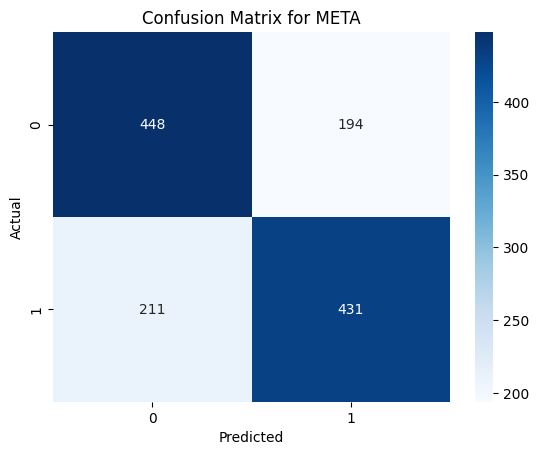


Model Evaluation for NFLX:

              precision    recall  f1-score   support

           0       0.56      0.50      0.53       630
           1       0.55      0.60      0.58       630

    accuracy                           0.55      1260
   macro avg       0.55      0.55      0.55      1260
weighted avg       0.55      0.55      0.55      1260

ROC-AUC Score: 0.5532


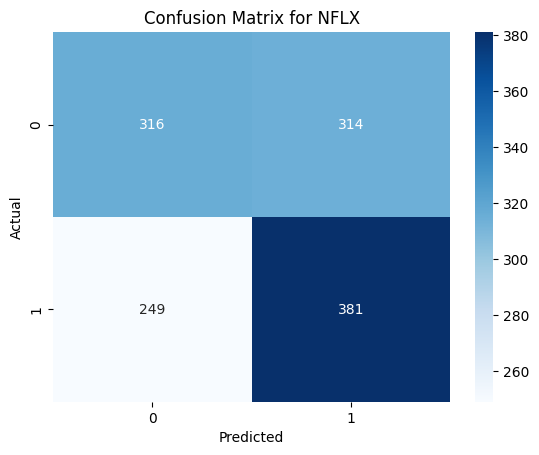

In [22]:
for ticker, (X_test, y_test) in company_datasets.items():
    print(f"\nModel Evaluation for {ticker}:\n")

    # Compute predictions again
    y_pred = (company_models[ticker].predict_proba(X_test)[:, 1] >= 0.5).astype(int)

    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {ticker}")
    plt.show()


   


In [ ]:


# Create a folder to store models if it doesn't exist
os.makedirs("saved_models", exist_ok=True)

# Initialize the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Apply scaling


#selected_f = X_train.columns.tolist()


# Save models and scalers
for ticker, model in company_models.items():
    model_filename = f"saved_models/{ticker}_model.joblib"
    scaler_filename = f"saved_models/{ticker}_scaler.joblib"
    
    
    joblib.dump(model, model_filename)  # Save the trained model
    joblib.dump(scaler, scaler_filename)  # Save the scaler
    

    print(f"✅ Model for {ticker} saved as {model_filename}")
    print(f"✅ Scaler for {ticker} saved as {scaler_filename}")
    



✅ Model for AAPL saved as saved_models/AAPL_model.joblib
✅ Scaler for AAPL saved as saved_models/AAPL_scaler.joblib
✅ Model for F saved as saved_models/F_model.joblib
✅ Scaler for F saved as saved_models/F_scaler.joblib
✅ Model for GOOG saved as saved_models/GOOG_model.joblib
✅ Scaler for GOOG saved as saved_models/GOOG_scaler.joblib
✅ Model for META saved as saved_models/META_model.joblib
✅ Scaler for META saved as saved_models/META_scaler.joblib
✅ Model for NFLX saved as saved_models/NFLX_model.joblib
✅ Scaler for NFLX saved as saved_models/NFLX_scaler.joblib
